<a href="https://colab.research.google.com/github/Xiao-Chen820/ASU-GIS322-Fall-2023/blob/master/notebooks/03_Module3c_matplotlib_display_shapelyObject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using matplotlib to plot lines

This tutorial gives an example of using matplotlib to plot lines represented in a shapely **MultiLineString**

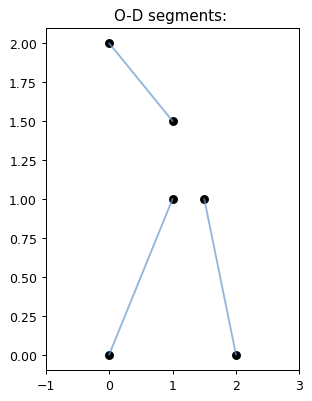

In [ ]:
from matplotlib import pyplot
from shapely.geometry import MultiLineString
import math
import numpy

COLOR = {
    True:  '#6699cc',
    False: '#ffcc33'
    }

def v_color(ob):
    return COLOR[ob.is_simple]

def plot_coords(ax, ob):  # display cordinates
    for line in ob.geoms:
        x, y = line.xy
        ax.plot(x, y, 'o', color='#999999', zorder=1)

def plot_bounds(ax, ob): # display coordinates at the bound (begin and end points of a line)
    for p in ob.geoms:
        x, y = zip(*list((q.x, q.y) for q in p.boundary.geoms))
        ax.plot(x, y, 'o', color='#000000', zorder=1)

def plot_lines(ax, ob): # draw lines
    for line in ob.geoms:
        #x, y = zip(*list(q.xy for q in line.geoms))
        x, y = line.xy
        ax.plot(x, y, color=v_color(ob), alpha=0.7,  solid_capstyle='round', zorder=2)

fig = pyplot.figure(1, figsize=(8.0, 4.0*(math.sqrt(5)-1)), dpi=90) # figuresize -- provide width and height information

# 1: multilinestring
ax = fig.add_subplot(121)

mline1 = MultiLineString([((0, 0), (1, 1)), ((0, 2),  (1, 1.5)), ((1.5, 1), (2, 0))])

plot_coords(ax, mline1)
plot_bounds(ax, mline1)
plot_lines(ax, mline1)

ax.set_title('O-D segments: ')

xrange = [-1, 3]
yrange = [-1, 3]
ax.set_xlim(*xrange)

pyplot.show()